<a href="https://colab.research.google.com/github/dzafik/trading-backtest/blob/main/All_Time_High.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Running backtest for EXCL.JK...


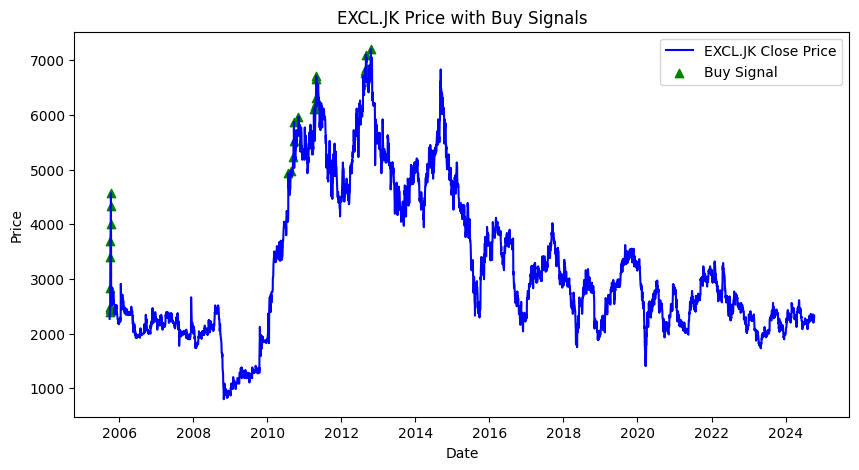

Running backtest for AALI.JK...


[*********************100%***********************]  1 of 1 completed


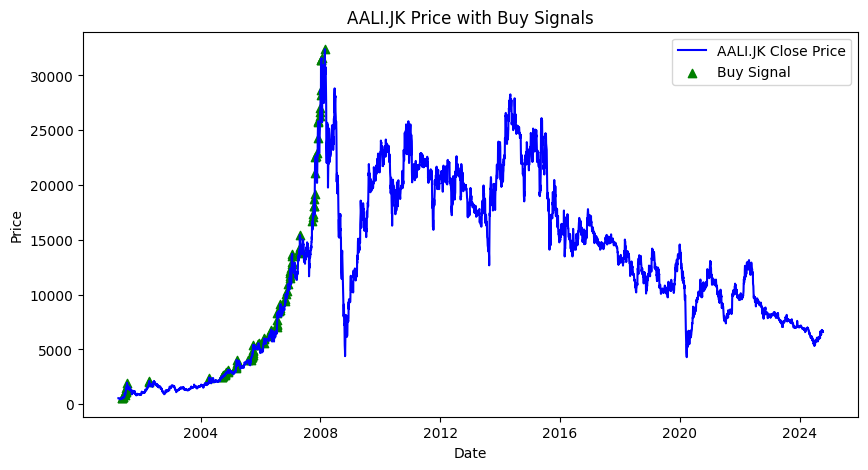

[*********************100%***********************]  1 of 1 completed

Running backtest for BRMS.JK...


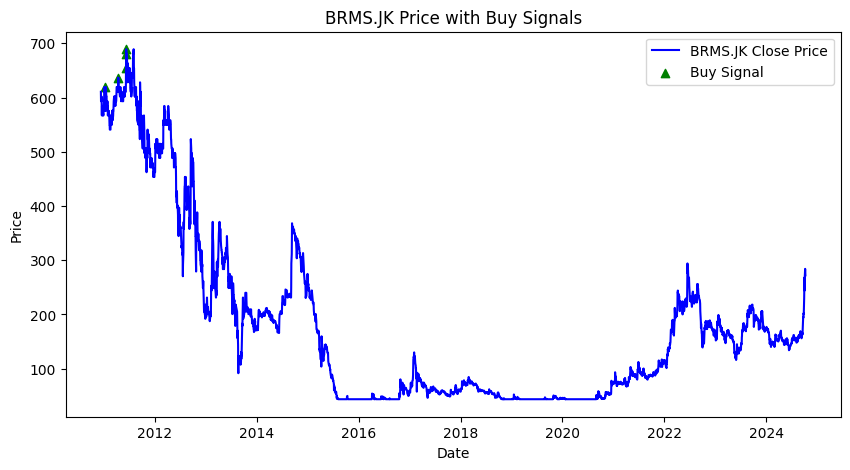

EXCL.JK - Number of Buy Signals: 26
AALI.JK - Number of Buy Signals: 108
BRMS.JK - Number of Buy Signals: 5


In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of tickers to backtest
tickers = ['EXCL.JK', 'AALI.JK', 'BRMS.JK']  # Add your desired tickers here

# Create a dictionary to store the results for each stock
results = {}

# Loop through each ticker in the list
for ticker in tickers:
    print(f"Running backtest for {ticker}...")

    # Fetch data from Yahoo Finance
    data = yf.download(ticker, period='max')

    # Calculate All-Time High
    data['All Time High'] = data['Close'].cummax()

    # Entry Signal: When the Close price breaks the previous All-Time High
    data['Signal'] = data['Close'] > data['All Time High'].shift(1)

    # Extract the buy signal dates and prices
    buy_signal_dates = data.index[data['Signal']]
    buy_signal_prices = data['Close'][data['Signal']]

    # Store results in dictionary
    results[ticker] = {
        'dates': buy_signal_dates,
        'prices': buy_signal_prices,
        'data': data
    }

    # Plot each stock with buy signals
    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label=f'{ticker} Close Price', color='blue')
    plt.scatter(buy_signal_dates, buy_signal_prices, color='green', label='Buy Signal', marker='^', alpha=1)
    plt.title(f"{ticker} Price with Buy Signals")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# If needed, you can access each ticker's results
for ticker, result in results.items():
    print(f"{ticker} - Number of Buy Signals: {len(result['dates'])}")
